<center><font size = "10"> Week 10 - Network Stimulation<center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignments to be delivered by next Monday before 23:59.
    
<font size='3'>__NOTE:__ The code from the tutorials generates random connections between cells, if you want to compare results you have to keep the same connections (same axon section connected to same basal section) between the cells. The same happens with the location of the exponential synapses. 
Make sure to reset your connections if necessary. HINT: In this homework all of the exercises are connected, this can help you avoid repeating the implementations.

## Optional: 5 neurons network: synchronous stimulation comparison

<font size='3'>  Load the five morphology reconstructions assigned to your group in week 7, using the class `Cell` defined in the tutorials: 
- Connect the neurons with `weight = 1.0`, following the first tutorial. 
- Add exponential synapses to random section of the basal dendrite of each cell (synapse `weight = 1.0` and `tau = 2`). 
- Create and compare two inputs protocols: irregular and regular synchronous stimulation. 
- Run the simulation of 300 ms and show the voltage and spike plots. 
- How do the two protocols differ?

# <font color= 'red'>Ex 1:</font>  Regular synchronous stimulation. Half weight synaptic connections.

<font size='3'>  Load the five morphology reconstructions assigned to your group in week 7, using the class `Cell` defined in the tutorials. Explore and compare three cases of the connectivity between neurons and exponential synapses placed on a random section of the basal dendrite of each neuron. 
<font size='3'>The 3 cases you should explore are: 

1. neurons connected with `weight = 1.0` and exponential synapses connected with `weight = 1.0` and `tau = 2 ms`
2. neurons connected with `weight = 0.5` and exponential synapses connected with `weight = 1.0` and `tau = 2 ms`
3. neurons connected with `weight = 1.0` and exponential synapses connected with `weight = 0.5` and `tau = 2 ms`
 
    
<font size='3'>Make sure that you are stimulating the same parts of basal dendrites in each simulation. Run a regular synchronous stimulation protocol for 300 ms and visualize the voltage and spike plots. Describe how do outcomes of these protocols differ. What is the effect of the changed weight on the activity of the network?    
    
<font size='3'><font color= 'red'>[1.5 pts]</font>

In [1]:
!nrnivmodl

/home/In silico/week10
Mod files: "./vecevent.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.8/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /usr/local/lib/python3.8/dist-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./vecevent.o  -L/usr/local/lib/python3.8/dist-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/usr/local/lib/python3.8/dist-packages/neuron/.data/lib   
rm -f ./.libs/libnrnmech.so ; mkdir -p ./.libs ; cp ./libnrnmech.so ./.libs/libnrnmech.so
Successfully created x86_64/special


### Load usefull packages

In [2]:
%matplotlib inline

from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np
import random

# Load external files & initialize
h.load_file("stdrun.hoc")
h.stdinit()

--No graphics will be displayed.


0.0

### Creation of the class cell

In [3]:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()

    def build_morphology(self, filename):
        h.load_file("import3d.hoc")
        h.load_file("stdlib.hoc")
        # morph_reader = h.Import3d_Neurolucida3()
        morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(
            self
        )  # Notice this change to be able to instantiate several cells

    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75

        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        if hasattr(self, "apic"):
            for sec in self.apic:
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.dend:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.axon:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

## Instantiate different cells

<font size='3'>__IMPORTANT:__ In the case, this cell shows an error. Don't pay attention to it, is not a fatal error and the cells got properly instantiated.
    
<font size='3'>You will be able to run simulations on them.

In [4]:
Pyr1 = Cell("Pyr_01.swc", "Pyr1", "Pyr")
Pyr2 = Cell("Pyr_02.swc", "Pyr2", "Pyr")
Pyr3 = Cell("Pyr_03.swc", "Pyr3", "Pyr")
Int1 = Cell("Int_01.swc", "Int1", "Int")
Int2 = Cell("Int_02.swc", "Int2", "Int")

cells_Pyr = [Pyr1, Pyr2, Pyr3]
cells_Int = [Int1, Int2]
cells = cells_Pyr + cells_Int

In [5]:
for c in cells_Pyr:
    print(
        "%s: %d apical sections, %d basal sections, %d soma sections and %d axon senctions"
        % (c.name, len(c.apic), len(c.dend), len(c.soma), len(c.axon))
    )
for c in cells_Int:
    print(
        "%s: %d basal sections, %d soma sections and %d axon senctions"
        % (c.name, len(c.dend), len(c.soma), len(c.axon))
    )

Pyr1: 73 apical sections, 61 basal sections, 1 soma sections and 23 axon senctions
Pyr2: 39 apical sections, 41 basal sections, 1 soma sections and 118 axon senctions
Pyr3: 93 apical sections, 53 basal sections, 1 soma sections and 69 axon senctions
Int1: 21 basal sections, 1 soma sections and 526 axon senctions
Int2: 21 basal sections, 1 soma sections and 526 axon senctions


### Scenario 1:  neurons connected with `weight = 1.0` and exponential synapses connected with `weight = 1.0` and `tau = 2 ms`

In [6]:
# connect two cells with an exponential synapse at given locations
# returns the netcon
def connect(
    source,
    target,
    weight=None,
    delay=5,
    source_sec=5,
    source_neurite="axon",
    target_sec=10,
    target_neurite="dend",
):
    rng = np.random.default_rng()

    if weight is None:
        weight = rng.uniform()  # random weight

    target_neurite_ = getattr(target, target_neurite)
    if target_sec is None:
        target_sec = rng.integers(0, len(target_neurite_))  # random dendritic section

    source_neurite_ = getattr(source, source_neurite)
    if source_sec is None:
        source_sec = rng.integers(0, len(source_neurite_))  # random axonal section

    target_syn = h.ExpSyn(target_neurite_[target_sec](0.5))
    target.synapses.append(target_syn)  # store synapse

    netcon = h.NetCon(
        source_neurite_[source_sec](0.5)._ref_v,
        target_syn,
        sec=source_neurite_[source_sec],
    )
    netcon.weight[0] = weight

    print(
        f"Connected cells {source.name} -> {target.name} with weight {weight} and delay {delay},\
        from {source_neurite}[{source_sec}] to {target_neurite}[{target_sec}]"
    )

    return netcon

In [7]:
# Connect neurons with a weight = 1.0
netcons = []  # save the netcons in case we want to modify them later

##### PC-PC #####
# Connect Pyr1 to Pyr2
nc = connect(Pyr1, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr1
nc = connect(Pyr2, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Pyr3
nc = connect(Pyr1, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr1
nc = connect(Pyr3, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr3
nc = connect(Pyr2, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr2
nc = connect(Pyr3, Pyr2, weight=1.0)
netcons.append(nc)


##### PC-Inh #####
# Connect Pyr1 to Int1
nc = connect(Pyr1, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Int2
nc = connect(Pyr1, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int1
nc = connect(Pyr2, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int2
nc = connect(Pyr2, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int1
nc = connect(Pyr3, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int2
nc = connect(Pyr3, Int2, weight=1.0)
netcons.append(nc)


##### Inh-PC #####
# Connect Int1 to Pyr1
nc = connect(Int1, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Int1 to Pyr2
nc = connect(Int1, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Int1 to Pyr3
nc = connect(Int1, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Int2 to Pyr1
nc = connect(Int2, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Int2 to Pyr2
nc = connect(Int2, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Int2 to Pyr3
nc = connect(Int2, Pyr3, weight=1.0)
netcons.append(nc)


##### Inh-Inh #####
# Connect Int1 to Int2
nc = connect(Int1, Int2, weight=1.0)
netcons.append(nc)

# Connect Int2 to Int1
nc = connect(Int2, Int1, weight=1.0)
netcons.append(nc)

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected 

In [8]:
# Place exponential synapses in random basal dendrite sections
# Exponential synapses with tau = 2

# Cell 1
sec1 = random.randint(0, len(Pyr1.dend) - 1)
synapse1 = h.ExpSyn(Pyr1.dend[sec1](0.5))
synapse1.tau = 2  # ms
print("Stimulus applied in basal section num %s of Pyr1" % sec1)

# Cell 2
sec2 = random.randint(0, len(Pyr2.dend) - 1)
synapse2 = h.ExpSyn(Pyr2.dend[sec2](0.5))
synapse2.tau = 2  # ms
print("Stimulus applied in basal section num %s of Pyr2" % sec2)

# Cell 3
sec3 = random.randint(0, len(Pyr3.dend) - 1)
synapse3 = h.ExpSyn(Pyr3.dend[sec3](0.5))
synapse3.tau = 2  # ms
print("Stimulus applied in basal section num %s of Pyr2" % sec3)

# Cell 4
sec4 = random.randint(0, len(Int1.dend) - 1)
synapse4 = h.ExpSyn(Int1.dend[sec4](0.5))
synapse4.tau = 2  # ms
print("Stimulus applied in basal section num %s of Int1" % sec4)

# Cell 5
sec5 = random.randint(0, len(Int2.dend) - 1)
synapse5 = h.ExpSyn(Int2.dend[sec5](0.5))
synapse5.tau = 2  # ms
print("Stimulus applied in basal section num %s of Int1" % sec5)

Stimulus applied in basal section num 56 of Pyr1
Stimulus applied in basal section num 40 of Pyr2
Stimulus applied in basal section num 31 of Pyr2
Stimulus applied in basal section num 13 of Int1
Stimulus applied in basal section num 6 of Int1


In [9]:
# Stimulator
stimulator = h.VecStim()
spike_times = np.arange(20, 140 + 1, 20)
print(f"spike times = {spike_times}")

spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector);

spike times = [ 20  40  60  80 100 120 140]


In [10]:
# Add stimulator to synapses
# Put a weight of 1.0 at the exponential synapses.
connection1 = h.NetCon(stimulator, synapse1)
connection1.weight[0] = 1. # In units of [nS] due to the gmax scaling factor in our .mod file
connection2 = h.NetCon(stimulator, synapse2)
connection2.weight[0] = 1.  # In units of [nS] due to the gmax scaling factor in our .mod file
connection3 = h.NetCon(stimulator, synapse3)
connection3.weight[0] = 1.  # In units of [nS] due to the gmax scaling factor in our .mod file
connection4 = h.NetCon(stimulator, synapse4)
connection4.weight[0] = 1.  # In units of [nS] due to the gmax scaling factor in our .mod file
connection5 = h.NetCon(stimulator, synapse5)
connection5.weight[0] = 1.  # In units of [nS] due to the gmax scaling factor in our .mod file

In [11]:
# Record the voltage from the soma and run the simulation.
soma_v1 = h.Vector().record(Pyr1.soma[0](0.5)._ref_v)
soma_v2 = h.Vector().record(Pyr2.soma[0](0.5)._ref_v)
soma_v3 = h.Vector().record(Pyr3.soma[0](0.5)._ref_v)
soma_v4 = h.Vector().record(Int1.soma[0](0.5)._ref_v)
soma_v5 = h.Vector().record(Int2.soma[0](0.5)._ref_v)

time = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(300);

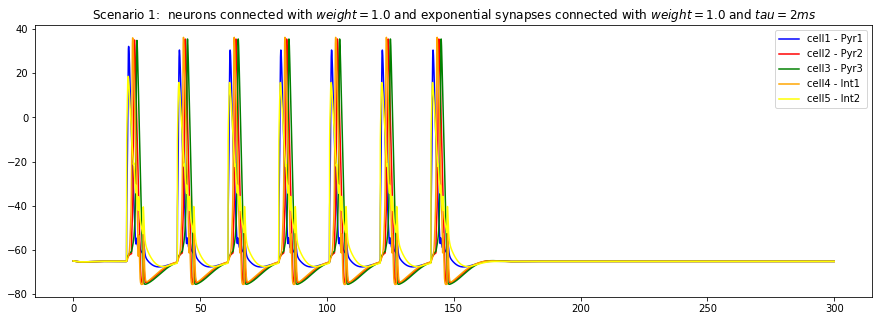

In [12]:
# Figure
# Define the same five colors for every plots
colors = ['blue', 'red', 'green', 'orange', 'yellow']

plt.figure(figsize=(15, 5))
plt.plot(time, soma_v1, color=colors[0], label="cell1 - Pyr1")
plt.plot(time, soma_v2, color=colors[1], label="cell2 - Pyr2")
plt.plot(time, soma_v3, color=colors[2], label="cell3 - Pyr3")
plt.plot(time, soma_v4, color=colors[3], label="cell4 - Int1")
plt.plot(time, soma_v5, color=colors[4], label="cell5 - Int2")
plt.title("Scenario 1:  neurons connected with $weight = 1.0$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend();

In [13]:
from scipy.signal import find_peaks

def spike_detector(voltage, threshold):
    # convert Neuron recording (voltage) to list
    voltage_read = []
    for v in voltage:
        voltage_read.append(v)
    # peak locations
    spike_time, _ = find_peaks(voltage_read, height=threshold)
    return spike_time


spikes1 = spike_detector(soma_v1, -20.0)
spikes2 = spike_detector(soma_v2, -20.0)
spikes3 = spike_detector(soma_v3, -20.0)
spikes4 = spike_detector(soma_v4, -20.0)
spikes5 = spike_detector(soma_v5, -20.0)

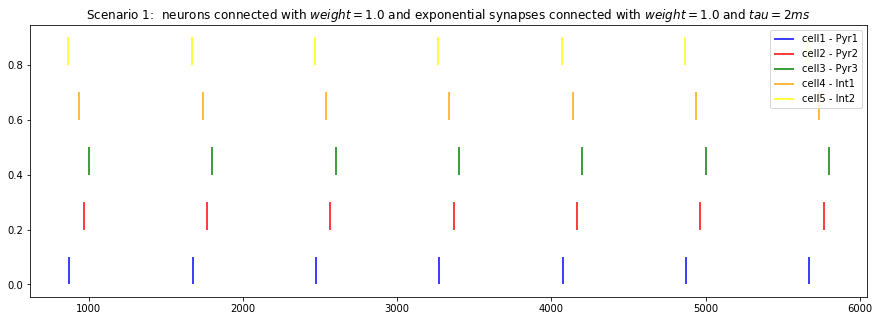

In [14]:
plt.figure(figsize=(15, 5))
plt.vlines(spikes1, ymin=0.0, ymax=0.1, color=colors[0], label="cell1 - Pyr1")
plt.vlines(spikes2, ymin=0.2, ymax=0.3, color=colors[1], label="cell2 - Pyr2")
plt.vlines(spikes3, ymin=0.4, ymax=0.5, color=colors[2], label="cell3 - Pyr3")
plt.vlines(spikes4, ymin=0.6, ymax=0.7, color=colors[3], label="cell4 - Int1")
plt.vlines(spikes5, ymin=0.8, ymax=0.9, color=colors[4], label="cell5 - Int2")
plt.title("Scenario 1:  neurons connected with $weight = 1.0$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()

### Scenario 2:  neurons connected with `weight = 0.5` and exponential synapses connected with `weight = 1.0` and `tau = 2 ms`

In [15]:
# Connect neurons with a weight = 0.5
netcons = []  # save the netcons in case we want to modify them later

##### PC-PC #####
# Connect Pyr1 to Pyr2
nc = connect(Pyr1, Pyr2, weight=0.5)
netcons.append(nc)

# Connect Pyr2 to Pyr1
nc = connect(Pyr2, Pyr1, weight=0.5)
netcons.append(nc)

# Connect Pyr1 to Pyr3
nc = connect(Pyr1, Pyr3, weight=0.5)
netcons.append(nc)

# Connect Pyr3 to Pyr1
nc = connect(Pyr3, Pyr1, weight=0.5)
netcons.append(nc)

# Connect Pyr2 to Pyr3
nc = connect(Pyr2, Pyr3, weight=0.5)
netcons.append(nc)

# Connect Pyr3 to Pyr2
nc = connect(Pyr3, Pyr2, weight=0.5)
netcons.append(nc)


##### PC-Inh #####
# Connect Pyr1 to Int1
nc = connect(Pyr1, Int1, weight=0.5)
netcons.append(nc)

# Connect Pyr1 to Int2
nc = connect(Pyr1, Int2, weight=0.5)
netcons.append(nc)

# Connect Pyr2 to Int1
nc = connect(Pyr2, Int1, weight=0.5)
netcons.append(nc)

# Connect Pyr2 to Int2
nc = connect(Pyr2, Int2, weight=0.5)
netcons.append(nc)

# Connect Pyr3 to Int1
nc = connect(Pyr3, Int1, weight=0.5)
netcons.append(nc)

# Connect Pyr3 to Int2
nc = connect(Pyr3, Int2, weight=0.5)
netcons.append(nc)


##### Inh-PC #####
# Connect Int1 to Pyr1
nc = connect(Int1, Pyr1, weight=0.5)
netcons.append(nc)

# Connect Int1 to Pyr2
nc = connect(Int1, Pyr2, weight=0.5)
netcons.append(nc)

# Connect Int1 to Pyr3
nc = connect(Int1, Pyr3, weight=0.5)
netcons.append(nc)

# Connect Int2 to Pyr1
nc = connect(Int2, Pyr1, weight=0.5)
netcons.append(nc)

# Connect Int2 to Pyr2
nc = connect(Int2, Pyr2, weight=0.5)
netcons.append(nc)

# Connect Int2 to Pyr3
nc = connect(Int2, Pyr3, weight=0.5)
netcons.append(nc)


##### Inh-Inh #####
# Connect Int1 to Int2
nc = connect(Int1, Int2, weight=0.5)
netcons.append(nc)

# Connect Int2 to Int1
nc = connect(Int2, Int1, weight=0.5)
netcons.append(nc)

Connected cells Pyr1 -> Pyr2 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr1 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Pyr3 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr1 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr3 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr2 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int1 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int2 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int1 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int2 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Int1 with weight 0.5 and delay 5,        from axon[5] to dend[10]
Connected 

In [16]:
# Place exponential synapses in random basal dendrite sections
# Exponential synapses with tau = 2

# Cell 1
synapse1 = h.ExpSyn(Pyr1.dend[sec1](0.5))
synapse1.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr1" % sec1)

# Cell 2
synapse2 = h.ExpSyn(Pyr2.dend[sec2](0.5))
synapse2.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec2)

# Cell 3
synapse3 = h.ExpSyn(Pyr3.dend[sec3](0.5))
synapse3.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec3)

# Cell 4
synapse4 = h.ExpSyn(Int1.dend[sec4](0.5))
synapse4.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec4)

# Cell 5
synapse5 = h.ExpSyn(Int2.dend[sec5](0.5))
synapse5.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec5)

Stimulus apply in basal section num 56 of Pyr1
Stimulus apply in basal section num 40 of Pyr2
Stimulus apply in basal section num 31 of Pyr2
Stimulus apply in basal section num 13 of Int1
Stimulus apply in basal section num 6 of Int1


In [17]:
# Stimulator
stimulator = h.VecStim()
spike_times = np.arange(20, 140 + 1, 20)
print(f"spike times = {spike_times}")

spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector);

spike times = [ 20  40  60  80 100 120 140]


In [18]:
# Add stimulator to synapses
# Put a weight of 1.0 at the exponential synapses.
connection1 = h.NetCon(stimulator, synapse1)
connection1.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection2 = h.NetCon(stimulator, synapse2)
connection2.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection3 = h.NetCon(stimulator, synapse3)
connection3.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection4 = h.NetCon(stimulator, synapse4)
connection4.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection5 = h.NetCon(stimulator, synapse5)
connection5.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

In [19]:
# Record the voltage from the soma and run the simulation.
soma_v1 = h.Vector().record(Pyr1.soma[0](0.5)._ref_v)
soma_v2 = h.Vector().record(Pyr2.soma[0](0.5)._ref_v)
soma_v3 = h.Vector().record(Pyr3.soma[0](0.5)._ref_v)
soma_v4 = h.Vector().record(Int1.soma[0](0.5)._ref_v)
soma_v5 = h.Vector().record(Int2.soma[0](0.5)._ref_v)

time = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(300);

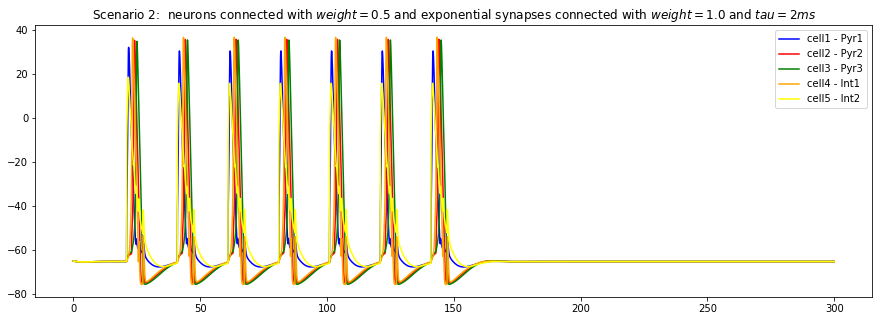

In [20]:
# Figure
plt.figure(figsize=(15, 5))
plt.plot(time, soma_v1, color=colors[0], label="cell1 - Pyr1")
plt.plot(time, soma_v2, color=colors[1], label="cell2 - Pyr2")
plt.plot(time, soma_v3, color=colors[2], label="cell3 - Pyr3")
plt.plot(time, soma_v4, color=colors[3], label="cell4 - Int1")
plt.plot(time, soma_v5, color=colors[4], label="cell5 - Int2")
plt.title("Scenario 2:  neurons connected with $weight = 0.5$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()
plt.show()

In [21]:
spikes1 = spike_detector(soma_v1, -20.0)
spikes2 = spike_detector(soma_v2, -20.0)
spikes3 = spike_detector(soma_v3, -20.0)
spikes4 = spike_detector(soma_v4, -20.0)
spikes5 = spike_detector(soma_v5, -20.0)

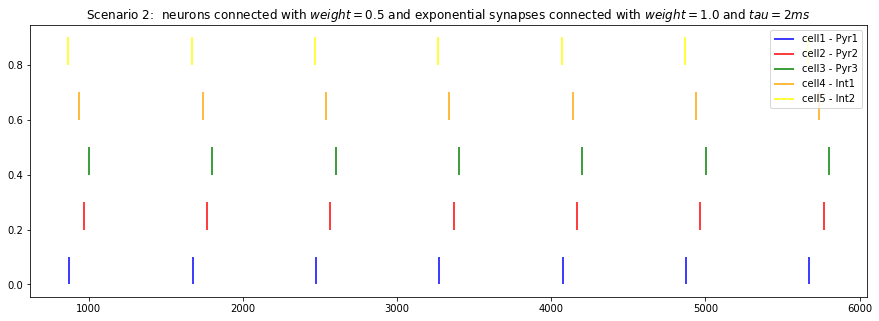

In [22]:
plt.figure(figsize=(15, 5))
plt.vlines(spikes1, ymin=0.0, ymax=0.1, color=colors[0], label="cell1 - Pyr1")
plt.vlines(spikes2, ymin=0.2, ymax=0.3, color=colors[1], label="cell2 - Pyr2")
plt.vlines(spikes3, ymin=0.4, ymax=0.5, color=colors[2], label="cell3 - Pyr3")
plt.vlines(spikes4, ymin=0.6, ymax=0.7, color=colors[3], label="cell4 - Int1")
plt.vlines(spikes5, ymin=0.8, ymax=0.9, color=colors[4], label="cell5 - Int2")
plt.title("Scenario 2:  neurons connected with $weight = 0.5$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()

### Scenario 3:  neurons connected with `weight = 1.0` and exponential synapses connected with `weight = 0.5` and `tau = 2 ms`

In [23]:
# Connect neurons with a weight = 1.0
netcons = []  # save the netcons in case we want to modify them later

##### PC-PC #####
# Connect Pyr1 to Pyr2
nc = connect(Pyr1, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr1
nc = connect(Pyr2, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Pyr3
nc = connect(Pyr1, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr1
nc = connect(Pyr3, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr3
nc = connect(Pyr2, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr2
nc = connect(Pyr3, Pyr2, weight=1.0)
netcons.append(nc)


##### PC-Inh #####
# Connect Pyr1 to Int1
nc = connect(Pyr1, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Int2
nc = connect(Pyr1, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int1
nc = connect(Pyr2, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int2
nc = connect(Pyr2, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int1
nc = connect(Pyr3, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int2
nc = connect(Pyr3, Int2, weight=1.0)
netcons.append(nc)


##### Inh-PC #####
# Connect Int1 to Pyr1
nc = connect(Int1, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Int1 to Pyr2
nc = connect(Int1, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Int1 to Pyr3
nc = connect(Int1, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Int2 to Pyr1
nc = connect(Int2, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Int2 to Pyr2
nc = connect(Int2, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Int2 to Pyr3
nc = connect(Int2, Pyr3, weight=1.0)
netcons.append(nc)


##### Inh-Inh #####
# Connect Int1 to Int2
nc = connect(Int1, Int2, weight=1.0)
netcons.append(nc)

# Connect Int2 to Int1
nc = connect(Int2, Int1, weight=1.0)
netcons.append(nc)

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected 

In [24]:
# Place exponential synapses in random basal dendrite sections
# Exponential synapses with tau = 2

# Cell 1
synapse1 = h.ExpSyn(Pyr1.dend[sec1](0.5))
synapse1.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr1" % sec1)

# Cell 2
synapse2 = h.ExpSyn(Pyr2.dend[sec2](0.5))
synapse2.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec2)

# Cell 3
synapse3 = h.ExpSyn(Pyr3.dend[sec3](0.5))
synapse3.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec3)

# Cell 4
synapse4 = h.ExpSyn(Int1.dend[sec4](0.5))
synapse4.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec4)

# Cell 5
synapse5 = h.ExpSyn(Int2.dend[sec5](0.5))
synapse5.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec5)

Stimulus apply in basal section num 56 of Pyr1
Stimulus apply in basal section num 40 of Pyr2
Stimulus apply in basal section num 31 of Pyr2
Stimulus apply in basal section num 13 of Int1
Stimulus apply in basal section num 6 of Int1


In [25]:
# Stimulator
stimulator = h.VecStim()
spike_times = np.arange(20, 140 + 1, 20)
print(f"spike times = {spike_times}")

spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector);

spike times = [ 20  40  60  80 100 120 140]


In [26]:
# Add stimulator to synapses
# Put a weight of 0.5 at the exponential synapses.
connection1 = h.NetCon(stimulator, synapse1)
connection1.weight[0] = 0.5  # In units of [nS] due to the gmax scaling factor in our .mod file
connection2 = h.NetCon(stimulator, synapse2)
connection2.weight[0] = 0.5  # In units of [nS] due to the gmax scaling factor in our .mod file
connection3 = h.NetCon(stimulator, synapse3)
connection3.weight[0] = 0.5  # In units of [nS] due to the gmax scaling factor in our .mod file
connection4 = h.NetCon(stimulator, synapse4)
connection4.weight[0] = 0.5  # In units of [nS] due to the gmax scaling factor in our .mod file
connection5 = h.NetCon(stimulator, synapse5)
connection5.weight[0] = 0.5  # In units of [nS] due to the gmax scaling factor in our .mod file

In [27]:
# Record the voltage from the soma and run the simulation.
soma_v1 = h.Vector().record(Pyr1.soma[0](0.5)._ref_v)
soma_v2 = h.Vector().record(Pyr2.soma[0](0.5)._ref_v)
soma_v3 = h.Vector().record(Pyr3.soma[0](0.5)._ref_v)
soma_v4 = h.Vector().record(Int1.soma[0](0.5)._ref_v)
soma_v5 = h.Vector().record(Int2.soma[0](0.5)._ref_v)

time = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(300);

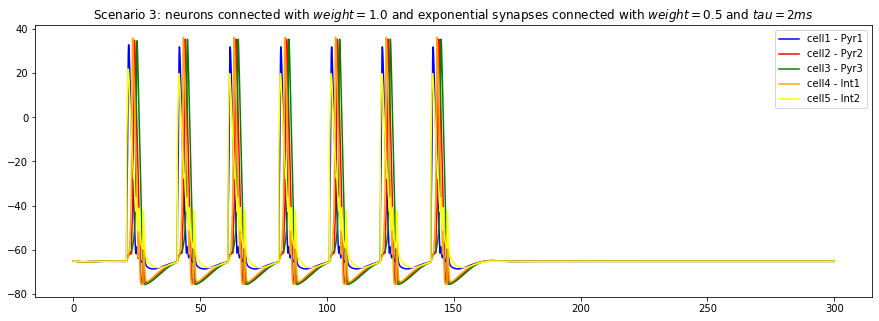

In [28]:
# Figure
plt.figure(figsize=(15, 5))
plt.plot(time, soma_v1, color=colors[0], label="cell1 - Pyr1")
plt.plot(time, soma_v2, color=colors[1], label="cell2 - Pyr2")
plt.plot(time, soma_v3, color=colors[2], label="cell3 - Pyr3")
plt.plot(time, soma_v4, color=colors[3], label="cell4 - Int1")
plt.plot(time, soma_v5, color=colors[4], label="cell5 - Int2")
plt.title("Scenario 3: neurons connected with $weight = 1.0$ and exponential synapses connected with $weight = 0.5$ and $tau = 2 ms$")
plt.legend()
plt.show()

In [29]:
spikes1 = spike_detector(soma_v1, -20.0)
spikes2 = spike_detector(soma_v2, -20.0)
spikes3 = spike_detector(soma_v3, -20.0)
spikes4 = spike_detector(soma_v4, -20.0)
spikes5 = spike_detector(soma_v5, -20.0)

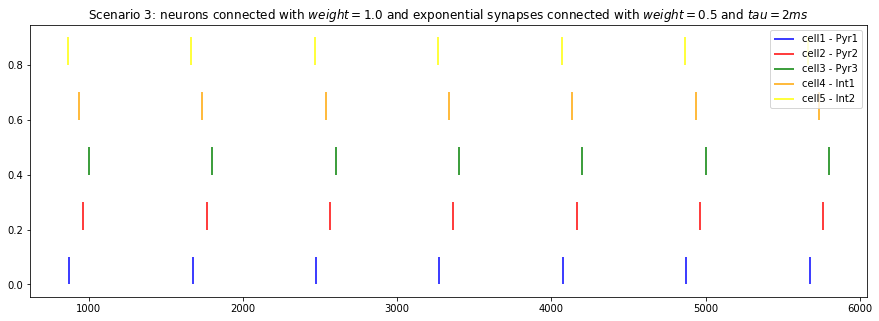

In [30]:
plt.figure(figsize=(15, 5))
plt.vlines(spikes1, ymin=0.0, ymax=0.1, color=colors[0], label="cell1 - Pyr1")
plt.vlines(spikes2, ymin=0.2, ymax=0.3, color=colors[1], label="cell2 - Pyr2")
plt.vlines(spikes3, ymin=0.4, ymax=0.5, color=colors[2], label="cell3 - Pyr3")
plt.vlines(spikes4, ymin=0.6, ymax=0.7, color=colors[3], label="cell4 - Int1")
plt.vlines(spikes5, ymin=0.8, ymax=0.9, color=colors[4], label="cell5 - Int2")
plt.title("Scenario 3: neurons connected with $weight = 1.0$ and exponential synapses connected with $weight = 0.5$ and $tau = 2 ms$")
plt.legend()

From the spike detection, we conclude that the stimulation is indeed regular.
Concerning the change of weight, we expect the network results to be mostly driven by the stimulation itself when we set the stimulation weight to 1 and connection weight to 0.5. In the contrary, when the weight for the connection is bigger, we expect to have a network that is more driven by the connection between cells than by the stimulations that we apply.\n
Here we do not observe any clear differences between the three scenarios. An explanation for this could be that all cells are tightly connected, and the stimulaiton is important enough to always produce the spike in all the cells, independently of the weight that is given.



# <font color= 'red'>Ex 2:</font>  Inhibitory neurons: effect on the network. 
    
<font size='3'>
    
Load the five neurons following the previous exercise. Add exponential synapses (`weight = 1.0`, `tau = 2 ms`) to a random section of the basal dendrite of each cell. Create an irregular asynchronous stimulation and apply it to each exponential synapse. Run a simulation long enough to contain the last stimulation and plot the cells voltage response and the spikes.

1. Connect neurons with the following weights:
- `w(Pyr - Pyr) = 1`
- `w(Pyr - Int) = 1`
- `w(Int - Pyr) = -0.01`
- `w(Int - Int) = -0.01`
  
Plot the results in two plots one showing the cells voltage response and other with the spike detection. What is the role of the interneurons in this circuit? Experiment with different `w(Int - Pyr)` weights and describe their effect. How does the networks activity compare to positive weights?
    
    
2. Disconnect the inhibitory neurons and run the same protocol. Compare the results with the network from the first half of this exercise. Describe the role of the inhibitory neurons in small networks.

    
<font size='3'><font color= 'red'>[2 pts]</font>

In [31]:
# Connect neurons with a weight = 1.0 or -0.01 
netcons = []  # save the netcons in case we want to modify them later

##### w(Pyr-Pyr) = 1 #####
# Connect Pyr1 to Pyr2
nc = connect(Pyr1, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr1
nc = connect(Pyr2, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Pyr3
nc = connect(Pyr1, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr1
nc = connect(Pyr3, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr3
nc = connect(Pyr2, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr2
nc = connect(Pyr3, Pyr2, weight=1.0)
netcons.append(nc)


##### w(Pyr-Int) = 1 #####
# Connect Pyr1 to Int1
nc = connect(Pyr1, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Int2
nc = connect(Pyr1, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int1
nc = connect(Pyr2, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int2
nc = connect(Pyr2, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int1
nc = connect(Pyr3, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int2
nc = connect(Pyr3, Int2, weight=1.0)
netcons.append(nc)


##### w(Int-Pyr) = -0.01 #####
# Connect Int1 to Pyr1
nc = connect(Int1, Pyr1, weight=-0.01)
netcons.append(nc)

# Connect Int1 to Pyr2
nc = connect(Int1, Pyr2, weight=-0.01)
netcons.append(nc)

# Connect Int1 to Pyr3
nc = connect(Int1, Pyr3, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr1
nc = connect(Int2, Pyr1, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr2
nc = connect(Int2, Pyr2, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr3
nc = connect(Int2, Pyr3, weight=-0.01)
netcons.append(nc)


##### w(Pyr-Int) = -0.01 #####
# Connect Int1 to Int2
nc = connect(Int1, Int2, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Int1
nc = connect(Int2, Int1, weight=-0.01)
netcons.append(nc)

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected 

In [32]:
# Place exponential synapses in random basal dendrite sections
# Exponential synapses with tau = 2

# Cell 1
synapse1 = h.ExpSyn(Pyr1.dend[sec1](0.5))
synapse1.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr1" % sec1)

# Cell 2
synapse2 = h.ExpSyn(Pyr2.dend[sec2](0.5))
synapse2.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec2)

# Cell 3
synapse3 = h.ExpSyn(Pyr3.dend[sec3](0.5))
synapse3.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec3)

# Cell 4
synapse4 = h.ExpSyn(Int1.dend[sec4](0.5))
synapse4.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec4)

# Cell 5
synapse5 = h.ExpSyn(Int2.dend[sec5](0.5))
synapse5.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec5)

Stimulus apply in basal section num 56 of Pyr1
Stimulus apply in basal section num 40 of Pyr2
Stimulus apply in basal section num 31 of Pyr2
Stimulus apply in basal section num 13 of Int1
Stimulus apply in basal section num 6 of Int1


In [33]:
def generate_irregular_spiketrain(t_start, size):
    """generates irregular spike train with random inter-spike interval from the range between 10 and 50 ms"""
    stim_times = [t_start]
    for t in np.arange(size):
        n = np.random.randint(10, 50)
        step = stim_times[-1] + n
        stim_times.append(step)

    return stim_times

In [34]:

# Create random stimulation times for each neuron
stim_times1 = generate_irregular_spiketrain(20, 7)
stim_times2 = generate_irregular_spiketrain(30, 7)
stim_times3 = generate_irregular_spiketrain(10, 7)
stim_times4 = generate_irregular_spiketrain(0, 7)
stim_times5 = generate_irregular_spiketrain(40, 7)

print(f"stimulation times 1 = {stim_times1}")
print(f"stimulation times 2 = {stim_times2}")
print(f"stimulation times 3 = {stim_times3}")
print(f"stimulation times 4 = {stim_times4}")
print(f"stimulation times 5 = {stim_times5}")


stimulation times 1 = [20, 61, 104, 148, 177, 188, 234, 249]
stimulation times 2 = [30, 68, 81, 97, 108, 130, 150, 167]
stimulation times 3 = [10, 41, 72, 86, 121, 144, 183, 217]
stimulation times 4 = [0, 11, 37, 61, 95, 124, 168, 214]
stimulation times 5 = [40, 79, 105, 117, 157, 193, 234, 278]


In [35]:
# Stimulator
stimulator1 = h.VecStim()
spikes_vector1 = h.Vector(stim_times1)
stimulator1.play(spikes_vector1)

stimulator2 = h.VecStim()
spikes_vector2 = h.Vector(stim_times2)
stimulator2.play(spikes_vector2)

stimulator3 = h.VecStim()
spikes_vector3 = h.Vector(stim_times3)
stimulator3.play(spikes_vector3)

stimulator4 = h.VecStim()
spikes_vector4 = h.Vector(stim_times4)
stimulator4.play(spikes_vector4)

stimulator5 = h.VecStim()
spikes_vector5 = h.Vector(stim_times5)
stimulator5.play(spikes_vector5)


# Put a weight of 1.0 at the exponential synapses.
connection1 = h.NetCon(stimulator1, synapse1)
connection1.weight[0] = 1.0 # In units of [nS] due to the gmax scaling factor in our .mod file
connection2 = h.NetCon(stimulator2, synapse2)
connection2.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection3 = h.NetCon(stimulator3, synapse3)
connection3.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection4 = h.NetCon(stimulator4, synapse4)
connection4.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection5 = h.NetCon(stimulator5, synapse5)
connection5.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

In [36]:
# Record the voltage from the soma and run the simulation.
soma_v1 = h.Vector().record(Pyr1.soma[0](0.5)._ref_v)
soma_v2 = h.Vector().record(Pyr2.soma[0](0.5)._ref_v)
soma_v3 = h.Vector().record(Pyr3.soma[0](0.5)._ref_v)
soma_v4 = h.Vector().record(Int1.soma[0](0.5)._ref_v)
soma_v5 = h.Vector().record(Int2.soma[0](0.5)._ref_v)

time = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(300);

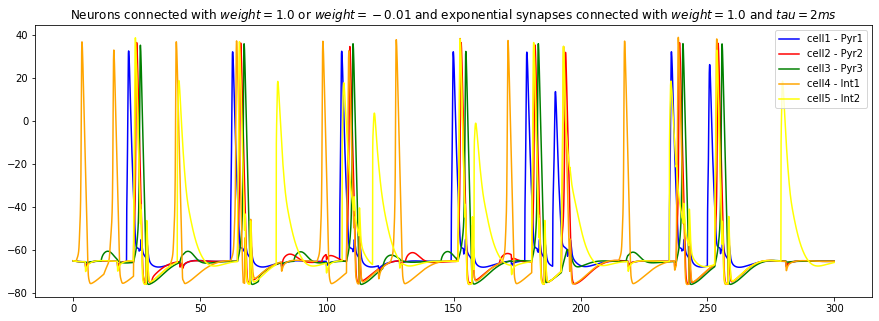

In [37]:
# Figure
plt.figure(figsize=(15, 5))
plt.plot(time, soma_v1, color=colors[0], label="cell1 - Pyr1")
plt.plot(time, soma_v2, color=colors[1], label="cell2 - Pyr2")
plt.plot(time, soma_v3, color=colors[2], label="cell3 - Pyr3")
plt.plot(time, soma_v4, color=colors[3], label="cell4 - Int1")
plt.plot(time, soma_v5, color=colors[4], label="cell5 - Int2")
plt.title("Neurons connected with $weight = 1.0$ or $weight = -0.01$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()
plt.show()

In [38]:
spikes1 = spike_detector(soma_v1, -20.0)
spikes2 = spike_detector(soma_v2, -20.0)
spikes3 = spike_detector(soma_v3, -20.0)
spikes4 = spike_detector(soma_v4, -20.0)
spikes5 = spike_detector(soma_v5, -20.0)

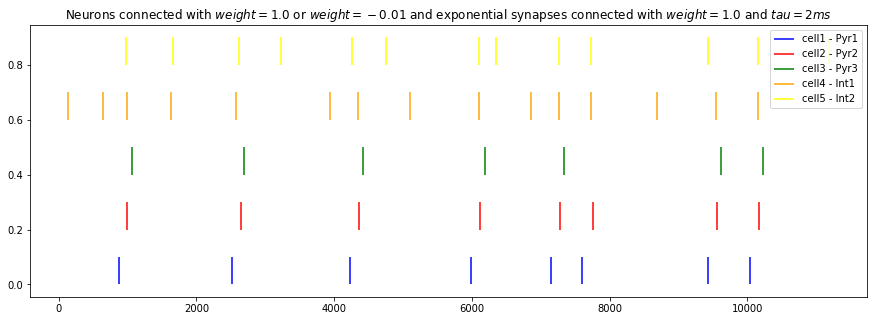

In [39]:
plt.figure(figsize=(15, 5))
plt.vlines(spikes1, ymin=0.0, ymax=0.1, color=colors[0], label="cell1 - Pyr1")
plt.vlines(spikes2, ymin=0.2, ymax=0.3, color=colors[1], label="cell2 - Pyr2")
plt.vlines(spikes3, ymin=0.4, ymax=0.5, color=colors[2], label="cell3 - Pyr3")
plt.vlines(spikes4, ymin=0.6, ymax=0.7, color=colors[3], label="cell4 - Int1")
plt.vlines(spikes5, ymin=0.8, ymax=0.9, color=colors[4], label="cell5 - Int2")
plt.title("Neurons connected with $weight = 1.0$ or $weight = -0.01$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()

We indeed have an asynchronous and irregular stimulation.

### Scenario 2: if we disconnect all inhibitory neurons, we put the weight on connection w(Inh - Pyr) and w(Inh - Inh) to 0.

In [40]:
# disconnecting the inhibitory neurons.

##### w(Int-Pyr) = -0.01 #####
# Connect Int1 to Pyr1
nc = connect(Int1, Pyr1, weight=0)
netcons.append(nc)

# Connect Int1 to Pyr2
nc = connect(Int1, Pyr2, weight=0)
netcons.append(nc)

# Connect Int1 to Pyr3
nc = connect(Int1, Pyr3, weight=0)
netcons.append(nc)

# Connect Int2 to Pyr1
nc = connect(Int2, Pyr1, weight=0)
netcons.append(nc)

# Connect Int2 to Pyr2
nc = connect(Int2, Pyr2, weight=0)
netcons.append(nc)

# Connect Int2 to Pyr3
nc = connect(Int2, Pyr3, weight=0)
netcons.append(nc)

# Connect Int2 to Int1
nc = connect(Int2, Int1, weight=0)
netcons.append(nc)

Connected cells Int1 -> Pyr1 with weight 0 and delay 5,        from axon[5] to dend[10]
Connected cells Int1 -> Pyr2 with weight 0 and delay 5,        from axon[5] to dend[10]
Connected cells Int1 -> Pyr3 with weight 0 and delay 5,        from axon[5] to dend[10]
Connected cells Int2 -> Pyr1 with weight 0 and delay 5,        from axon[5] to dend[10]
Connected cells Int2 -> Pyr2 with weight 0 and delay 5,        from axon[5] to dend[10]
Connected cells Int2 -> Pyr3 with weight 0 and delay 5,        from axon[5] to dend[10]
Connected cells Int2 -> Int1 with weight 0 and delay 5,        from axon[5] to dend[10]


In [41]:
# Place exponential synapses in random basal dendrite sections
# Exponential synapses with tau = 2

# Cell 1
synapse1 = h.ExpSyn(Pyr1.dend[sec1](0.5))
synapse1.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr1" % sec1)

# Cell 2
synapse2 = h.ExpSyn(Pyr2.dend[sec2](0.5))
synapse2.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec2)

# Cell 3
synapse3 = h.ExpSyn(Pyr3.dend[sec3](0.5))
synapse3.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec3)

# Cell 4
synapse4 = h.ExpSyn(Int1.dend[sec4](0.5))
synapse4.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec4)

# Cell 5
synapse5 = h.ExpSyn(Int2.dend[sec5](0.5))
synapse5.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec5)

Stimulus apply in basal section num 56 of Pyr1
Stimulus apply in basal section num 40 of Pyr2
Stimulus apply in basal section num 31 of Pyr2
Stimulus apply in basal section num 13 of Int1
Stimulus apply in basal section num 6 of Int1


In [42]:
# Stimulator
stimulator1 = h.VecStim()
spikes_vector1 = h.Vector(stim_times1)
stimulator1.play(spikes_vector1)

stimulator2 = h.VecStim()
spikes_vector2 = h.Vector(stim_times2)
stimulator2.play(spikes_vector2)

stimulator3 = h.VecStim()
spikes_vector3 = h.Vector(stim_times3)
stimulator3.play(spikes_vector3)

stimulator4 = h.VecStim()
spikes_vector4 = h.Vector(stim_times4)
stimulator4.play(spikes_vector4)

stimulator5 = h.VecStim()
spikes_vector5 = h.Vector(stim_times5)
stimulator5.play(spikes_vector5)


# Put a weight of 1.0 at the exponential synapses.
connection1 = h.NetCon(stimulator1, synapse1)
connection1.weight[0] = 1.0 # In units of [nS] due to the gmax scaling factor in our .mod file
connection2 = h.NetCon(stimulator2, synapse2)
connection2.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection3 = h.NetCon(stimulator3, synapse3)
connection3.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection4 = h.NetCon(stimulator4, synapse4)
connection4.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection5 = h.NetCon(stimulator5, synapse5)
connection5.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

In [43]:
# Record the voltage from the soma and run the simulation.
soma_v1 = h.Vector().record(Pyr1.soma[0](0.5)._ref_v)
soma_v2 = h.Vector().record(Pyr2.soma[0](0.5)._ref_v)
soma_v3 = h.Vector().record(Pyr3.soma[0](0.5)._ref_v)
soma_v4 = h.Vector().record(Int1.soma[0](0.5)._ref_v)
soma_v5 = h.Vector().record(Int2.soma[0](0.5)._ref_v)

time = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(300);

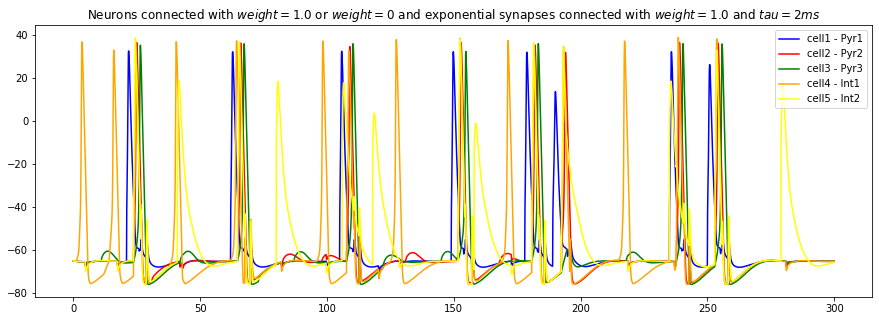

In [44]:
# Figure
plt.figure(figsize=(15, 5))
plt.plot(time, soma_v1, color=colors[0], label="cell1 - Pyr1")
plt.plot(time, soma_v2, color=colors[1], label="cell2 - Pyr2")
plt.plot(time, soma_v3, color=colors[2], label="cell3 - Pyr3")
plt.plot(time, soma_v4, color=colors[3], label="cell4 - Int1")
plt.plot(time, soma_v5, color=colors[4], label="cell5 - Int2")
plt.title("Neurons connected with $weight = 1.0$ or $weight = 0$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()
plt.show()

In [45]:
spikes1 = spike_detector(soma_v1, -20.0)
spikes2 = spike_detector(soma_v2, -20.0)
spikes3 = spike_detector(soma_v3, -20.0)
spikes4 = spike_detector(soma_v4, -20.0)
spikes5 = spike_detector(soma_v5, -20.0)

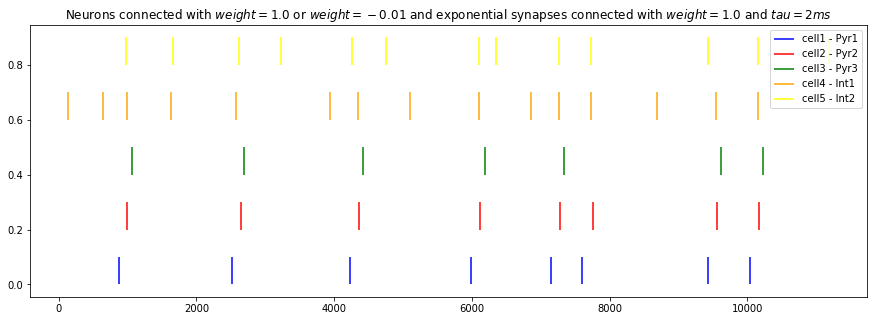

In [46]:
plt.figure(figsize=(15, 5))
plt.vlines(spikes1, ymin=0.0, ymax=0.1, color=colors[0], label="cell1 - Pyr1")
plt.vlines(spikes2, ymin=0.2, ymax=0.3, color=colors[1], label="cell2 - Pyr2")
plt.vlines(spikes3, ymin=0.4, ymax=0.5, color=colors[2], label="cell3 - Pyr3")
plt.vlines(spikes4, ymin=0.6, ymax=0.7, color=colors[3], label="cell4 - Int1")
plt.vlines(spikes5, ymin=0.8, ymax=0.9, color=colors[4], label="cell5 - Int2")
plt.title("Neurons connected with $weight = 1.0$ or $weight = -0.01$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()

The inhibitory neurons should inhibit the other cells, and prevent them form spiking, depending on their stimulation. Indeed, this is what we observe: when the inhibitroy cells are connected to all the other cells (scenario 1) we observe that the pyramidal cells will less likely spike, and some stimulations are not always leading to a spike because the cells are inhibited. 

# <font color= 'red'>Ex 3:</font>  Poisson Stimulation 

<font size='3'>
Load the five neurons following the previous exercises and connect them with the following weights: 

- `w(Pyr - Pyr) = 1`
- `w(Pyr - Int) = 1`
- `w(Int - Pyr) = -0.01`
- `w(Int - Int) = -0.01`

Add exponential synapses to random section of the basal dendrite of each cell (synapse `weight = 1.0` and `tau = 2 ms`). 

Design a Poisson stimulation spike train generator with use of the numpy function `np.random.poisson()`. Connect different poissonian spike trains to each of the exponential synapses. 
    
Define the Poisson distribution. Is it a good representation of the spiking activity? The provided function has one parameter `lam`, please find potential values that could be used for `lam` (through experimentation or literature search).
    
Plot and compare the incoming spike trains and networks activity with the one you obtained in irregular asynchronous stimulation protocol. 
    
<font size='3'><font color= 'red'>[2.5 pts]</font>

In [47]:
# Connect neurons with a weight = 1.0 or -0.01 
netcons = []  # save the netcons in case we want to modify them later

##### w(Pyr-Pyr) = 1 #####
# Connect Pyr1 to Pyr2
nc = connect(Pyr1, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr1
nc = connect(Pyr2, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Pyr3
nc = connect(Pyr1, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr1
nc = connect(Pyr3, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr3
nc = connect(Pyr2, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr2
nc = connect(Pyr3, Pyr2, weight=1.0)
netcons.append(nc)


##### w(Pyr-Int) = 1 #####
# Connect Pyr1 to Int1
nc = connect(Pyr1, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Int2
nc = connect(Pyr1, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int1
nc = connect(Pyr2, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int2
nc = connect(Pyr2, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int1
nc = connect(Pyr3, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int2
nc = connect(Pyr3, Int2, weight=1.0)
netcons.append(nc)


##### w(Int-Pyr) = -0.01 #####
# Connect Int1 to Pyr1
nc = connect(Int1, Pyr1, weight=-0.01)
netcons.append(nc)

# Connect Int1 to Pyr2
nc = connect(Int1, Pyr2, weight=-0.01)
netcons.append(nc)

# Connect Int1 to Pyr3
nc = connect(Int1, Pyr3, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr1
nc = connect(Int2, Pyr1, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr2
nc = connect(Int2, Pyr2, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr3
nc = connect(Int2, Pyr3, weight=-0.01)
netcons.append(nc)


##### w(Pyr-Int) = -0.01 #####
# Connect Int1 to Int2
nc = connect(Int1, Int2, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Int1
nc = connect(Int2, Int1, weight=-0.01)
netcons.append(nc)

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected 

In [48]:
# Place exponential synapses in random basal dendrite sections
# Exponential synapses with tau = 2

# Cell 1
synapse1 = h.ExpSyn(Pyr1.dend[sec1](0.5))
synapse1.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr1" % sec1)

# Cell 2
synapse2 = h.ExpSyn(Pyr2.dend[sec2](0.5))
synapse2.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec2)

# Cell 3
synapse3 = h.ExpSyn(Pyr3.dend[sec3](0.5))
synapse3.tau = 2  # ms
print("Stimulus apply in basal section num %s of Pyr2" % sec2)

# Cell 4
synapse4 = h.ExpSyn(Int1.dend[sec4](0.5))
synapse4.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec3)

# Cell 5
synapse5 = h.ExpSyn(Int2.dend[sec5](0.5))
synapse5.tau = 2  # ms
print("Stimulus apply in basal section num %s of Int1" % sec3)

Stimulus apply in basal section num 56 of Pyr1
Stimulus apply in basal section num 40 of Pyr2
Stimulus apply in basal section num 40 of Pyr2
Stimulus apply in basal section num 31 of Int1
Stimulus apply in basal section num 31 of Int1


In [71]:
def generate_poisson_spiketrain(t_start, size):
    """generates Poisson spike train"""
    stim_times = [t_start]
    for t in np.arange(size-1):
        n = np.random.poisson(35)
        step = stim_times[-1] + n
        stim_times.append(step)

    return stim_times

In [72]:
stimulation_times_poisson1 = generate_poisson_spiketrain(10, 7)
print(f"stimulation times 1 = {stimulation_times_poisson1}")

stimulation times 1 = [10, 44, 88, 120, 152, 190, 220]


In [73]:
stimulation_times_poisson2 = generate_poisson_spiketrain(20, 7)
print(f"stimulation times 2 = {stimulation_times_poisson2}")

stimulation times 2 = [20, 57, 86, 110, 154, 188, 225]


In [74]:
stimulation_times_poisson3 = generate_poisson_spiketrain(30, 7)
print(f"stimulation times 3 = {stimulation_times_poisson3}")

stimulation times 3 = [30, 66, 97, 121, 160, 192, 226]


In [75]:
stimulation_times_poisson4 = generate_poisson_spiketrain(40, 7)
print(f"stimulation times 4 = {stimulation_times_poisson4}")

stimulation times 4 = [40, 74, 108, 143, 169, 208, 244]


In [76]:
stimulation_times_poisson5 = generate_poisson_spiketrain(15, 7)
print(f"stimulation times 5 = {stimulation_times_poisson5}")

stimulation times 5 = [15, 45, 79, 114, 144, 172, 213]


In [77]:
# Stimulator
stimulator1 = h.VecStim()
spikes_vector1 = h.Vector(stimulation_times_poisson1)
stimulator1.play(spikes_vector1)

stimulator2 = h.VecStim()
spikes_vector2 = h.Vector(stimulation_times_poisson2)
stimulator2.play(spikes_vector2)

stimulator3 = h.VecStim()
spikes_vector3 = h.Vector(stimulation_times_poisson3)
stimulator3.play(spikes_vector3)

stimulator4 = h.VecStim()
spikes_vector4 = h.Vector(stimulation_times_poisson4)
stimulator4.play(spikes_vector4)

stimulator5 = h.VecStim()
spikes_vector5 = h.Vector(stimulation_times_poisson5)
stimulator5.play(spikes_vector5)


# Put a weight of 1.0 at the exponential synapses.
connection1 = h.NetCon(stimulator1, synapse1)
connection1.weight[0] = 1.0 # In units of [nS] due to the gmax scaling factor in our .mod file
connection2 = h.NetCon(stimulator2, synapse2)
connection2.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection3 = h.NetCon(stimulator3, synapse3)
connection3.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection4 = h.NetCon(stimulator4, synapse4)
connection4.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file
connection5 = h.NetCon(stimulator5, synapse5)
connection5.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

In [78]:
# Record the voltage from the soma and run the simulation.
soma_v1 = h.Vector().record(Pyr1.soma[0](0.5)._ref_v)
soma_v2 = h.Vector().record(Pyr2.soma[0](0.5)._ref_v)
soma_v3 = h.Vector().record(Pyr3.soma[0](0.5)._ref_v)
soma_v4 = h.Vector().record(Int1.soma[0](0.5)._ref_v)
soma_v5 = h.Vector().record(Int2.soma[0](0.5)._ref_v)

time = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(300);

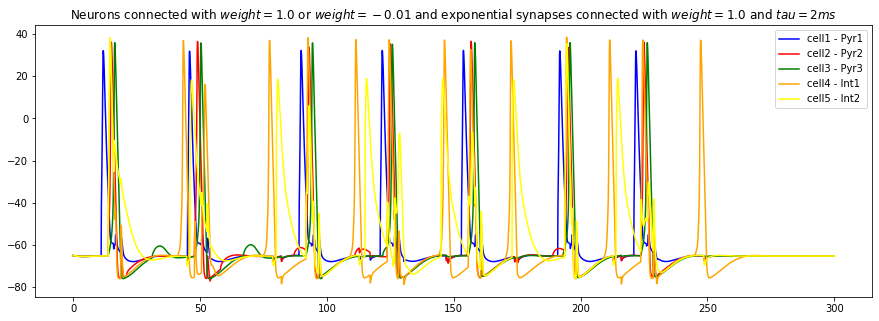

In [79]:
# Figure
plt.figure(figsize=(15, 5))
plt.plot(time, soma_v1, color=colors[0], label="cell1 - Pyr1")
plt.plot(time, soma_v2, color=colors[1], label="cell2 - Pyr2")
plt.plot(time, soma_v3, color=colors[2], label="cell3 - Pyr3")
plt.plot(time, soma_v4, color=colors[3], label="cell4 - Int1")
plt.plot(time, soma_v5, color=colors[4], label="cell5 - Int2")
plt.title("Neurons connected with $weight = 1.0$ or $weight = -0.01$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()
plt.show()

In [80]:
spikes1 = spike_detector(soma_v1, -20.0)
spikes2 = spike_detector(soma_v2, -20.0)
spikes3 = spike_detector(soma_v3, -20.0)
spikes4 = spike_detector(soma_v4, -20.0)
spikes5 = spike_detector(soma_v5, -20.0)

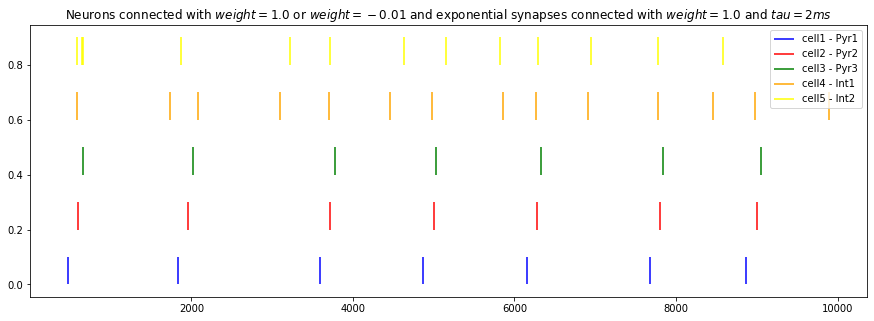

In [81]:
plt.figure(figsize=(15, 5))
plt.vlines(spikes1, ymin=0.0, ymax=0.1, color=colors[0], label="cell1 - Pyr1")
plt.vlines(spikes2, ymin=0.2, ymax=0.3, color=colors[1], label="cell2 - Pyr2")
plt.vlines(spikes3, ymin=0.4, ymax=0.5, color=colors[2], label="cell3 - Pyr3")
plt.vlines(spikes4, ymin=0.6, ymax=0.7, color=colors[3], label="cell4 - Int1")
plt.vlines(spikes5, ymin=0.8, ymax=0.9, color=colors[4], label="cell5 - Int2")
plt.title("Neurons connected with $weight = 1.0$ or $weight = -0.01$ and exponential synapses connected with $weight = 1.0$ and $tau = 2 ms$")
plt.legend()

The poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occuring in a fixed time interval if the events are independent and have a known rate. Poisson spike train are characterized by exponentially distributed interspike intervals.
Poisson spike generator is used to model the network when the stimulation come from other areas of the brain (unknown network). If we know the expected number of spikes, we can model the known netowrk with the poisson ditribution stimulation. In this case, lambda would be the expected number of spikes in the interval. As we have already done some asynchronous irregular stimulation in this exercise, we can know the expected numer of spikes by counting how many spikes we observed in the previous stimulations. We choose the value lambda=35.

It is a good representation of the spiking activity, because both asynchornous irregular and poisson generated stimulation represent inputs coming form othe brain areas. Additionally, the spiking results are similar.